In [25]:
import pandas as pd
import numpy as np


df = pd.read_csv('titanic.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
df.sample(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
108,108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
748,748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
850,850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
490,490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
679,679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [29]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
# the percentage of missing values
round(df.isna().mean() * 100,2)

Unnamed: 0      0.00
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

- There are 19.87% missed data in the age3 column
- There are 0.22% missed data in the Embarked column
- There are 77.10% missed data in the Cabin column.

## Dropping some columns that has duplicates

In [32]:
# dropping the null data in cabin column
df.drop('Cabin', axis=1, inplace=True)


In [33]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
df.drop('PassengerId', axis=1, inplace=True)

In [35]:
df.dropna(subset=['Embarked'], inplace=True)

Taking a closer look at the Age column

<AxesSubplot:>

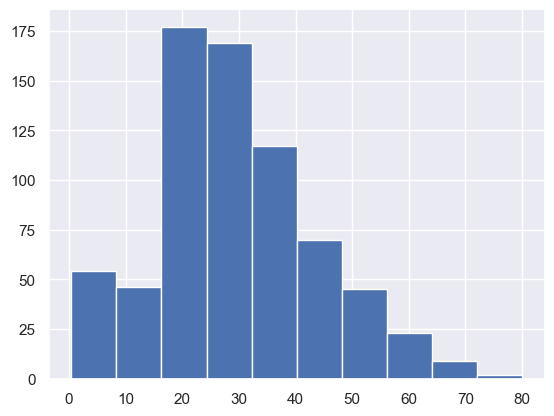

In [36]:
df.Age.hist()

There are 2 options to use and fill the age.
- Using the median or mode might not be suitable
- Using the Pclass, Sex columns to fill the Ages might be suitable

In [37]:
# the median age of females in the titanic ship was 27.0
df[df['Sex'] == 'female'].Age.median()

27.0

In [38]:
# the median age of males in the titanic ship was 29.0
df[df['Sex'] == 'male'].Age.median()

29.0

In [39]:
df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [41]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [43]:
# the percentage in each category
df['Survived'].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

## VISUALIZATIONS AND CONCLUSIONS

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
# creating a function that visualizes the categorical columns
def visualize_catcols(df,col):
    print(f'\n----{col}----')
    print(df[col].value_counts(normalize=True))
    sns.countplot(x=col, data=df)
    plt.show()


----Survived----
0    0.617548
1    0.382452
Name: Survived, dtype: float64


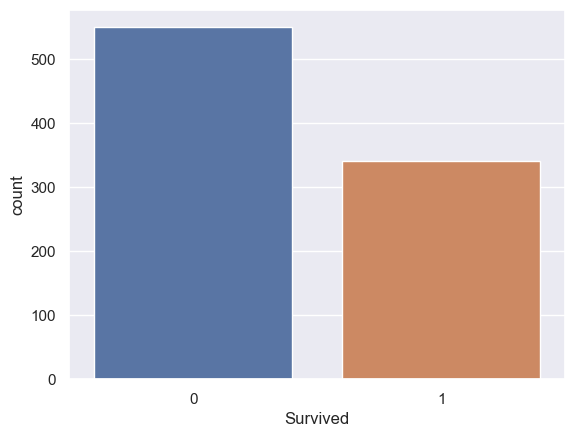


----Pclass----
3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64


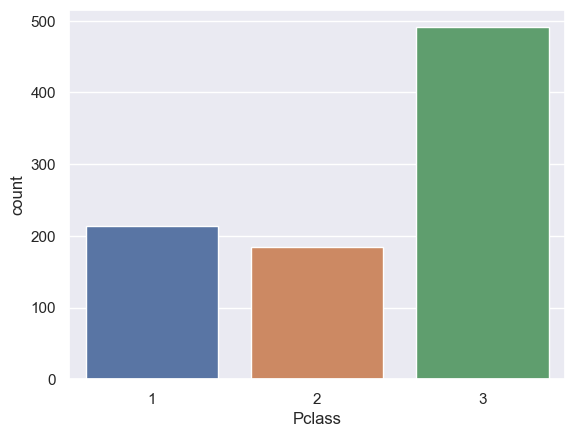


----Sex----
male      0.649044
female    0.350956
Name: Sex, dtype: float64


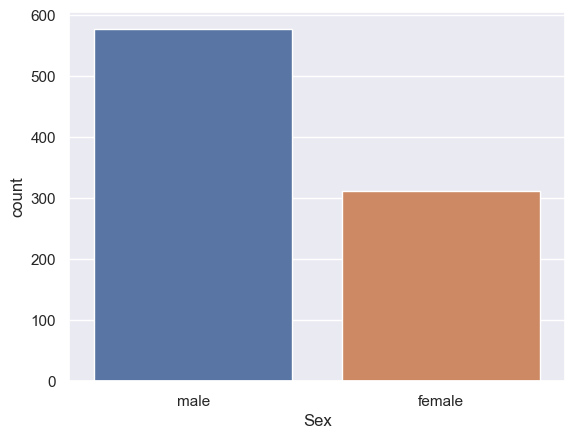


----SibSp----
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: SibSp, dtype: float64


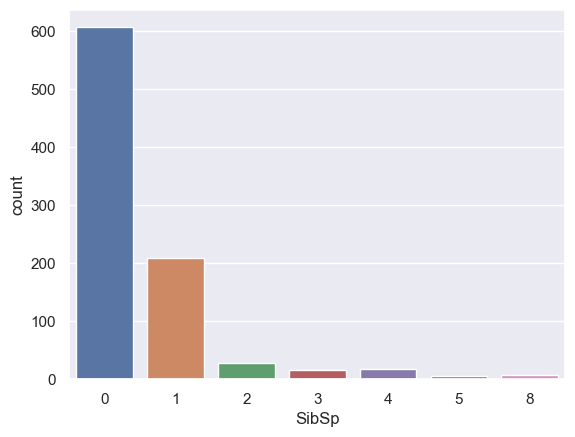


----Parch----
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: Parch, dtype: float64


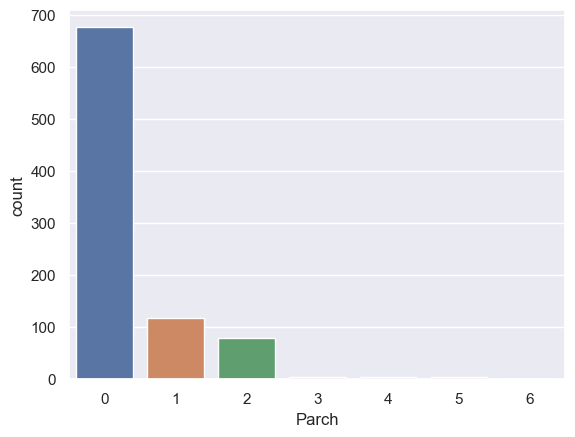


----Embarked----
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


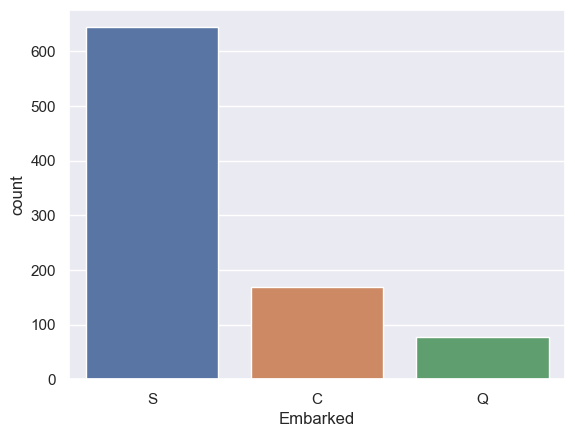

In [46]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for c in cols:
    visualize_catcols(df,c)

Conclusions/Notes
- 61% passengers died
- 38% passengers survived
- 55% of passesngers were from Class 3
- 24% of passengers booked Class 2
- 20% of passengers booked Class 1
- 64% of passengers were males
- 72% of passengers embarked from S(SouthHampton)

In [47]:
# creating a function that visualizes numerical columns
def visualize_numcols(df,col):
    print(f'\n-----{col}----')
    print(df[col].value_counts(normalize=True))
    sns.histplot(x=col, data=df)
    plt.show()


-----Age----
25.00    0.131609
21.50    0.047244
30.00    0.038245
40.00    0.038245
24.00    0.033746
           ...   
36.50    0.001125
55.50    0.001125
0.92     0.001125
23.50    0.001125
74.00    0.001125
Name: Age, Length: 89, dtype: float64


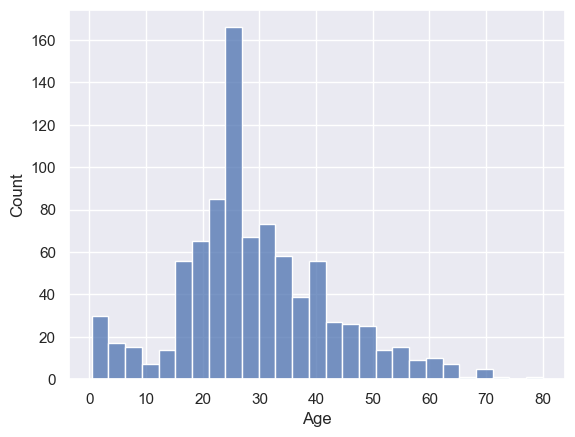


-----Fare----
8.0500     0.048369
13.0000    0.047244
7.8958     0.042745
7.7500     0.038245
26.0000    0.034871
             ...   
35.0000    0.001125
28.5000    0.001125
6.2375     0.001125
14.0000    0.001125
10.5167    0.001125
Name: Fare, Length: 247, dtype: float64


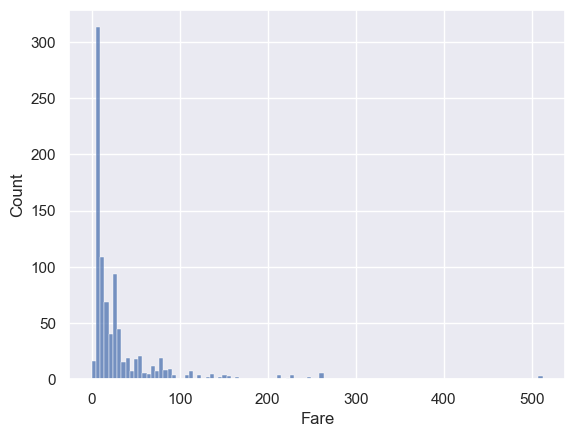

In [48]:
# numerical columns
cols= ['Age', 'Fare']

for c in cols:
    visualize_numcols(df,c)

Conclusions/Notes
-  Age range is between 10-40
-  Fare range: 0-100
- Outliers: fares above 100

## HOW TO DETERMINE THE SURVIVAL RATE

In [76]:
f = df['Survived'].value_counts()
f

0    549
1    340
Name: Survived, dtype: int64

Conclusion:
- 549 passengers died during the crisis
- 340 passengers survived during the crisis

In [77]:
# the mean of each passenger and where they embarked from that survived in the Titanic
df.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

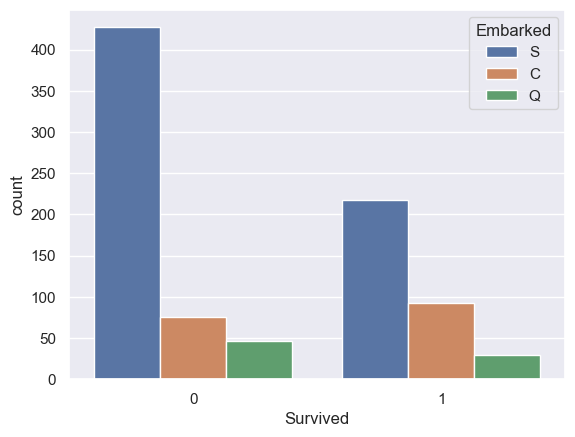

In [78]:
# the passengers whom survived and where they embarked from
sns.countplot(x='Survived', hue= 'Embarked', data=df)

Conclusion/Notes:
- 55% of passengers that ebarked from S(Southampton) survived
- 38% of passengers that embarked from C(Cherbourg) survived
- 33% of passengers that embarked from Q(Queenstown) survived

In [79]:
# survival rate of passengers in select columns
def visualize_survival_rate(df,col):
    print(f'\n---- {col} -----')
    print(df.groupby(col).Survived.mean())
    sns.barplot(x=col, y='Survived', data=df)
    
    plt.axhline(df.Survived.mean(), linestyle = '--')
    plt.show()


---- Sex -----
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


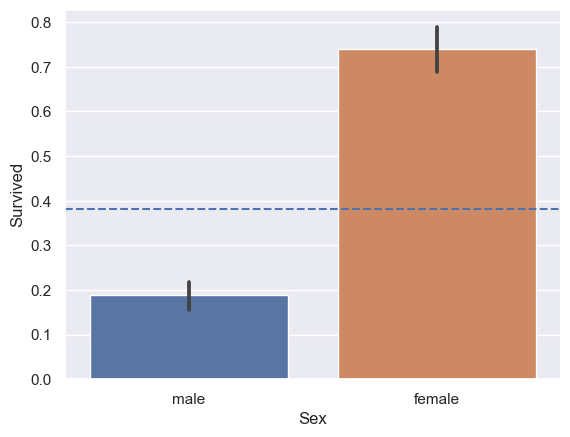


---- Embarked -----
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


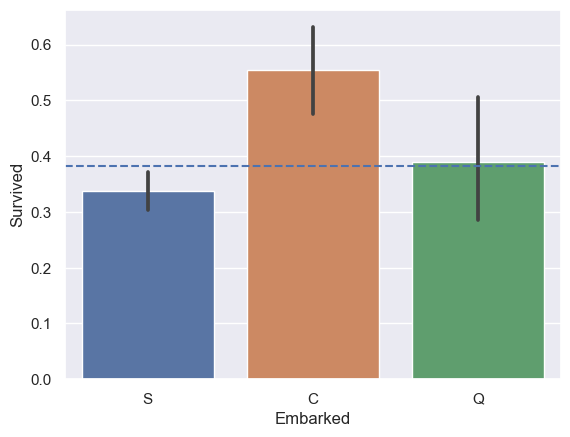


---- Pclass -----
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


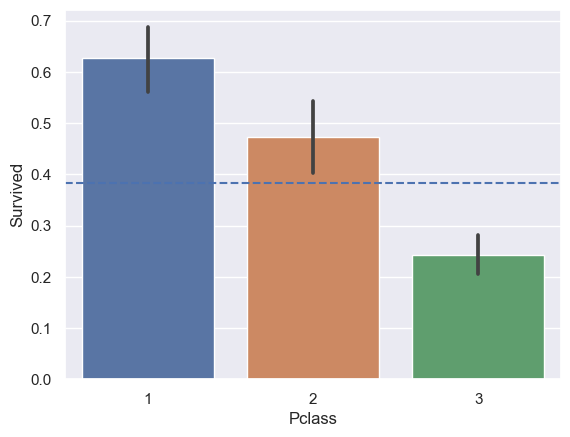

In [80]:
cols = ['Sex', 'Embarked', 'Pclass']

for c in cols:
    visualize_survival_rate(df,c)

## MY FINAL CONCLUSIONS

Using the Titanic dataset, these are my conclusions:
- 1st class ticket passengers had higher survival rate
- Female passengers had a higher survival rate than male passengers
- Passengers that embarked their journey from Cherbourg survived the crisis